# Data Preprocessing

In the previous notebook we collected all of our batter and pitcher stats and broke them down into per pitch events. This notebook will make sure that all of this data is processed properly so that it is ready to be fed to our machine learning models.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

df = pd.read_csv("../data/combine_data_raw.csv")
df.head()

,batter,pitcher,stand,p_throws,events,description,player_AVG,player_OBP,player_SLG,player_PA,mlbID,ERA,WHIP,SO9,SO/W,HR,BB,H,IP,BAbip
0,680776,686752,L,R,single,hit_into_play,0.285,0.342,0.492,735,686752,3.60,1.154,9.8,2.96,17,48,102,130.0,0.262
1,680776,663992,L,L,field_out,hit_into_play,0.285,0.342,0.492,735,663992,4.46,1.311,6.8,2.36,3,11,34,34.1,0.298
2,680776,663992,L,L,NaN,ball,0.285,0.342,0.492,735,663992,4.46,1.311,6.8,2.36,3,11,34,34.1,0.298
3,680776,663992,L,L,NaN,foul,0.285,0.342,0.492,735,663992,4.46,1.311,6.8,2.36,3,11,34,34.1,0.298
4,680776,663992,L,L,NaN,ball,0.285,0.342,0.492,735,663992,4.46,1.311,6.8,2.36,3,11,34,34.1,0.298


## Everything Must be a Number

In [2]:
df.drop("mlbID", axis=1)

stand_labels = df["stand"].unique()
p_throws_labels = df["p_throws"].unique()
events_labels = df["events"].unique()
description_labels = df["description"].unique()

print(stand_labels)
print(p_throws_labels)
print(events_labels)
print(description_labels)

['L' 'R']
['R' 'L']
['single' 'field_out' nan 'strikeout' 'hit_by_pitch' 'double'
 'truncated_pa' 'triple' 'walk' 'grounded_into_double_play' 'field_error'
 'home_run' 'force_out' 'sac_fly' 'fielders_choice_out' 'sac_bunt'
 'fielders_choice' 'double_play' 'strikeout_double_play' 'catcher_interf'
 'sac_fly_double_play']
['hit_into_play' 'ball' 'foul' 'swinging_strike' 'called_strike'
 'hit_by_pitch' 'swinging_strike_blocked' 'foul_tip' 'blocked_ball'
 'foul_bunt' 'pitchout' 'missed_bunt']


In [3]:
hit_events = ["single", "double", "triple", "home_run"]

df["is_hit"] = df["events"].isin(hit_events).astype(int)
df.head()

,batter,pitcher,stand,p_throws,events,description,player_AVG,player_OBP,player_SLG,player_PA,...,ERA,WHIP,SO9,SO/W,HR,BB,H,IP,BAbip,is_hit
0,680776,686752,L,R,single,hit_into_play,0.285,0.342,0.492,735,...,3.60,1.154,9.8,2.96,17,48,102,130.0,0.262,1
1,680776,663992,L,L,field_out,hit_into_play,0.285,0.342,0.492,735,...,4.46,1.311,6.8,2.36,3,11,34,34.1,0.298,0
2,680776,663992,L,L,NaN,ball,0.285,0.342,0.492,735,...,4.46,1.311,6.8,2.36,3,11,34,34.1,0.298,0
3,680776,663992,L,L,NaN,foul,0.285,0.342,0.492,735,...,4.46,1.311,6.8,2.36,3,11,34,34.1,0.298,0
4,680776,663992,L,L,NaN,ball,0.285,0.342,0.492,735,...,4.46,1.311,6.8,2.36,3,11,34,34.1,0.298,0


In [4]:
final_pitch_df = df.dropna(subset="events").copy()
final_pitch_df.describe()

,batter,pitcher,player_AVG,player_OBP,player_SLG,player_PA,mlbID,ERA,WHIP,SO9,SO/W,HR,BB,H,IP,BAbip,is_hit
count,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5389.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000
mean,671175.522681,637221.639141,0.259378,0.323802,0.440648,454.634327,637221.639141,4.112444,1.284617,8.674968,3.118057,12.853175,32.814108,94.750972,102.900426,0.290846,0.234956
std,45219.346312,49885.528826,0.023411,0.030035,0.062852,175.812326,49885.528826,3.024815,0.402205,1.866001,1.275392,8.495430,17.772895,55.116839,58.426361,0.043864,0.424011
min,596115.000000,434378.000000,0.190000,0.246000,0.219000,106.000000,434378.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000
25%,646240.000000,607625.000000,0.246000,0.303000,0.395000,307.000000,607625.000000,3.330000,1.152000,7.400000,2.220000,6.000000,19.000000,48.000000,54.100000,0.268000,0.000000
50%,666152.000000,657376.000000,0.266000,0.336000,0.459000,473.000000,657376.000000,3.810000,1.247000,8.500000,2.870000,11.000000,30.000000,81.000000,87.100000,0.290000,0.000000
75%,678882.000000,669923.000000,0.280000,0.342000,0.492000,571.000000,669923.000000,4.560000,1.419000,9.800000,3.700000,20.000000,47.000000,149.000000,164.000000,0.315000,0.000000
max,807799.000000,805673.000000,0.285000,0.359000,0.516000,735.000000,805673.000000,81.000000,10.500000,15.800000,8.500000,33.000000,77.000000,208.000000,216.000000,0.778000,1.000000


In [5]:
final_pitch_df = pd.get_dummies(final_pitch_df, columns=['stand', 'p_throws'], drop_first=True)
final_pitch_df.head()

,batter,pitcher,events,description,player_AVG,player_OBP,player_SLG,player_PA,mlbID,ERA,...,SO9,SO/W,HR,BB,H,IP,BAbip,is_hit,stand_R,p_throws_R
0,680776,686752,single,hit_into_play,0.285,0.342,0.492,735,686752,3.60,...,9.8,2.96,17,48,102,130.0,0.262,1,False,True
1,680776,663992,field_out,hit_into_play,0.285,0.342,0.492,735,663992,4.46,...,6.8,2.36,3,11,34,34.1,0.298,0,False,False
6,680776,682254,strikeout,swinging_strike,0.285,0.342,0.492,735,682254,1.86,...,15.8,3.40,0,5,6,9.2,0.400,0,False,False
9,680776,686752,strikeout,swinging_strike,0.285,0.342,0.492,735,686752,3.60,...,9.8,2.96,17,48,102,130.0,0.262,0,False,True
15,680776,669358,hit_by_pitch,hit_by_pitch,0.285,0.342,0.492,735,669358,3.06,...,7.8,2.56,9,27,57,79.1,0.229,0,False,True


In [ ]:
final_pitch_df["stand_R"] = final_pitch_df["stand_R"].astype(int)
final_pitch_df["p_throws_R"] = final_pitch_df["p_throws_R"].astype(int)

final_pitch_df.head()

,batter,pitcher,events,description,player_AVG,player_OBP,player_SLG,player_PA,mlbID,ERA,...,SO/W,HR,BB,H,IP,BAbip,is_hit,stand_R,p_throws_R,p_thtows_R
0,680776,686752,single,hit_into_play,0.285,0.342,0.492,735,686752,3.60,...,2.96,17,48,102,130.0,0.262,1,0,1,1
1,680776,663992,field_out,hit_into_play,0.285,0.342,0.492,735,663992,4.46,...,2.36,3,11,34,34.1,0.298,0,0,0,0
6,680776,682254,strikeout,swinging_strike,0.285,0.342,0.492,735,682254,1.86,...,3.40,0,5,6,9.2,0.400,0,0,0,0
9,680776,686752,strikeout,swinging_strike,0.285,0.342,0.492,735,686752,3.60,...,2.96,17,48,102,130.0,0.262,0,0,1,1
15,680776,669358,hit_by_pitch,hit_by_pitch,0.285,0.342,0.492,735,669358,3.06,...,2.56,9,27,57,79.1,0.229,0,0,1,1


In [8]:
final_pitch_df = final_pitch_df.drop("p_thtows_R", axis=1)
final_pitch_df.head()

,batter,pitcher,events,description,player_AVG,player_OBP,player_SLG,player_PA,mlbID,ERA,...,SO9,SO/W,HR,BB,H,IP,BAbip,is_hit,stand_R,p_throws_R
0,680776,686752,single,hit_into_play,0.285,0.342,0.492,735,686752,3.60,...,9.8,2.96,17,48,102,130.0,0.262,1,0,1
1,680776,663992,field_out,hit_into_play,0.285,0.342,0.492,735,663992,4.46,...,6.8,2.36,3,11,34,34.1,0.298,0,0,0
6,680776,682254,strikeout,swinging_strike,0.285,0.342,0.492,735,682254,1.86,...,15.8,3.40,0,5,6,9.2,0.400,0,0,0
9,680776,686752,strikeout,swinging_strike,0.285,0.342,0.492,735,686752,3.60,...,9.8,2.96,17,48,102,130.0,0.262,0,0,1
15,680776,669358,hit_by_pitch,hit_by_pitch,0.285,0.342,0.492,735,669358,3.06,...,7.8,2.56,9,27,57,79.1,0.229,0,0,1


In [9]:
# Step 1: map raw descriptions to broader types
description_category_map = {
    'hit_into_play': 'contact',
    'foul': 'foul',
    'foul_tip': 'foul',
    'foul_bunt': 'foul',
    'swinging_strike': 'swing_miss',
    'swinging_strike_blocked': 'swing_miss',
    'missed_bunt': 'swing_miss',
    'called_strike': 'called_strike',
    'ball': 'ball',
    'pitchout': 'ball',
    'blocked_ball': 'ball',
    'hit_by_pitch': 'hbp'
}

final_pitch_df['description_group'] = final_pitch_df['description'].map(description_category_map)

# Step 2: map categories to integers
description_int_map = {
    'contact': 0,
    'foul': 1,
    'swing_miss': 2,
    'called_strike': 3,
    'ball': 4,
    'hbp': 5
}

final_pitch_df['description_encoded'] = final_pitch_df['description_group'].map(description_int_map)

final_pitch_df.head()


,batter,pitcher,events,description,player_AVG,player_OBP,player_SLG,player_PA,mlbID,ERA,...,HR,BB,H,IP,BAbip,is_hit,stand_R,p_throws_R,description_group,description_encoded
0,680776,686752,single,hit_into_play,0.285,0.342,0.492,735,686752,3.60,...,17,48,102,130.0,0.262,1,0,1,contact,0
1,680776,663992,field_out,hit_into_play,0.285,0.342,0.492,735,663992,4.46,...,3,11,34,34.1,0.298,0,0,0,contact,0
6,680776,682254,strikeout,swinging_strike,0.285,0.342,0.492,735,682254,1.86,...,0,5,6,9.2,0.400,0,0,0,swing_miss,2
9,680776,686752,strikeout,swinging_strike,0.285,0.342,0.492,735,686752,3.60,...,17,48,102,130.0,0.262,0,0,1,swing_miss,2
15,680776,669358,hit_by_pitch,hit_by_pitch,0.285,0.342,0.492,735,669358,3.06,...,9,27,57,79.1,0.229,0,0,1,hbp,5


## Drop the last few columns

In [10]:
final_feature_set = final_pitch_df.drop(columns=["batter", "pitcher", "events", "mlbID", "description", "description_group"])

In [11]:
final_feature_set.head()

,player_AVG,player_OBP,player_SLG,player_PA,ERA,WHIP,SO9,SO/W,HR,BB,H,IP,BAbip,is_hit,stand_R,p_throws_R,description_encoded
0,0.285,0.342,0.492,735,3.60,1.154,9.8,2.96,17,48,102,130.0,0.262,1,0,1,0
1,0.285,0.342,0.492,735,4.46,1.311,6.8,2.36,3,11,34,34.1,0.298,0,0,0,0
6,0.285,0.342,0.492,735,1.86,1.138,15.8,3.40,0,5,6,9.2,0.400,0,0,0,2
9,0.285,0.342,0.492,735,3.60,1.154,9.8,2.96,17,48,102,130.0,0.262,0,0,1,2
15,0.285,0.342,0.492,735,3.06,1.059,7.8,2.56,9,27,57,79.1,0.229,0,0,1,5


In [15]:
final_feature_set.to_csv("../data/final_data_no_scale.csv", index=False)

## Normalize/scale values

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['player_AVG', 'player_OBP', 'player_SLG', 'player_PA',
                'ERA', 'WHIP', 'SO9', 'SO/W', 'HR', 'BB', 'H', 'IP', 'BAbip']

final_feature_set[cols_to_scale] = scaler.fit_transform(final_feature_set[cols_to_scale])

In [17]:
final_feature_set.head()

,player_AVG,player_OBP,player_SLG,player_PA,ERA,WHIP,SO9,SO/W,HR,BB,H,IP,BAbip,is_hit,stand_R,p_throws_R,description_encoded
0,1.094519,0.605956,0.817109,1.594835,-0.169429,-0.324782,0.602967,-0.123940,0.488169,0.854520,0.131533,0.463867,-0.657680,1,0,1,0
1,1.094519,0.605956,0.817109,1.594835,0.114912,0.065603,-1.004898,-0.594427,-1.159928,-1.227494,-1.102324,-1.177667,0.163116,0,0,0,0
6,1.094519,0.605956,0.817109,1.594835,-0.744724,-0.364566,3.818698,0.221084,-1.513092,-1.565118,-1.610382,-1.603884,2.488702,0,0,0,2
9,1.094519,0.605956,0.817109,1.594835,-0.169429,-0.324782,0.602967,-0.123940,0.488169,0.854520,0.131533,0.463867,-0.657680,0,0,1,2
15,1.094519,0.605956,0.817109,1.594835,-0.347969,-0.561001,-0.468943,-0.437598,-0.453601,-0.327164,-0.684990,-0.407395,-1.410076,0,0,1,5


In [21]:
final_feature_set.to_csv("../data/scaled_final_data.csv", index=False)

## Visualizations for Fun (And To Explore)

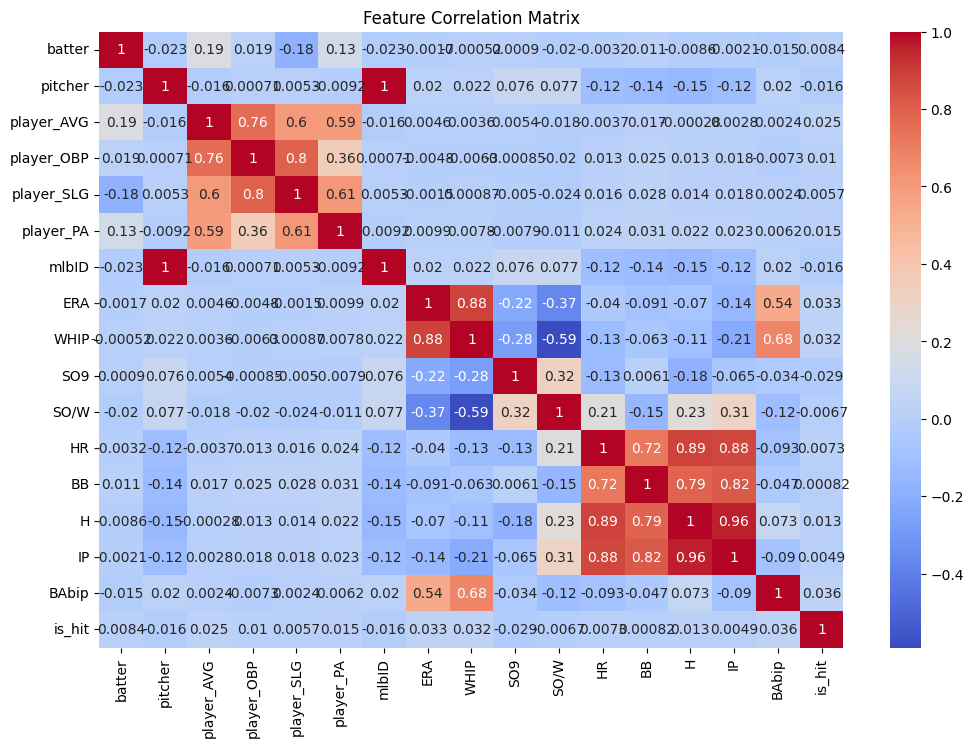

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()